# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 2.1: Regressores**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta como induzir modelos de regressão e avaliá-los

## Regressores Lineares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

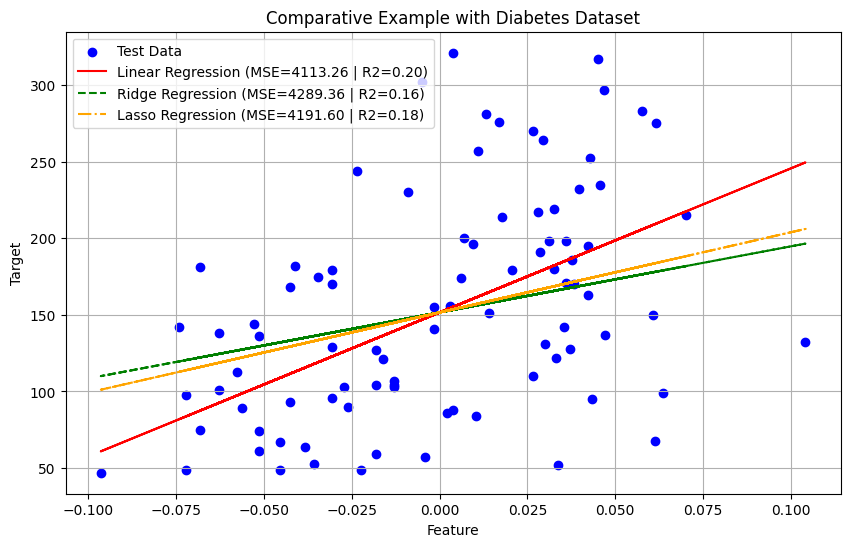

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 8]  # Use only one feature for simplicity
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Fit ridge regression model
ridge = Ridge(alpha=1)  # Regularization strength
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Fit lasso regression model
lasso = Lasso(alpha=1)  # Regularization strength
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Plot the data points and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, lr_pred, color='red', label='Linear Regression (MSE={:.2f} | R2={:.2f})'.format(lr_mse, lr_r2))
plt.plot(X_test, ridge_pred, color='green', linestyle='--', label='Ridge Regression (MSE={:.2f} | R2={:.2f})'.format(ridge_mse, ridge_r2))
plt.plot(X_test, lasso_pred, color='orange', linestyle='-.', label='Lasso Regression (MSE={:.2f} | R2={:.2f})'.format(lasso_mse, lasso_r2))
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Comparative Example with Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()

### Variação do parâmetro alpha

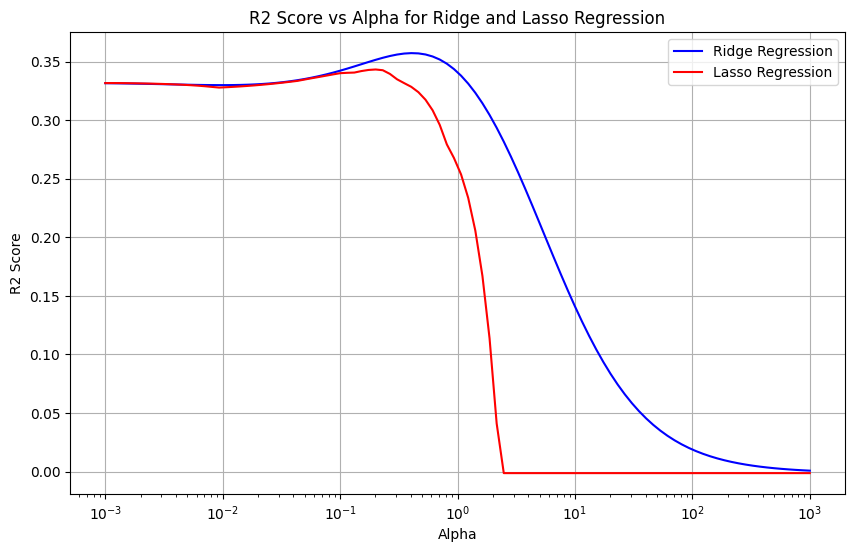

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a range of alpha values to test
alphas = np.logspace(-3, 3, 100)

# Initialize lists to store R2 scores for each alpha value
ridge_r2_scores = []
lasso_r2_scores = []

# Fit Ridge and Lasso regression models for each alpha value and calculate R2 scores
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_r2_scores.append(r2_score(y_test, ridge_pred))

    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_r2_scores.append(r2_score(y_test, lasso_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, ridge_r2_scores, label='Ridge Regression', color='blue')
plt.semilogx(alphas, lasso_r2_scores, label='Lasso Regression', color='red')
plt.title('R2 Score vs Alpha for Ridge and Lasso Regression')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

### Polynomial Linear Models


Polynomial Degree = 1
    MSE:  19782.195372018366
     R2:  0.19453110056409562


Polynomial Degree = 2
    MSE:  5214.965816052755
     R2:  0.7876629616956765


Polynomial Degree = 3
    MSE:  4429.9245928219
     R2:  0.8196273760691181


Polynomial Degree = 4
    MSE:  3422.2651157664222
     R2:  0.8606561069418343


Polynomial Degree = 5
    MSE:  3421.559172691433
     R2:  0.8606848507278996


Polynomial Degree = 6
    MSE:  3357.789868428218
     R2:  0.8632813366262918


Polynomial Degree = 7
    MSE:  3595.6848990928324
     R2:  0.8535949977277418


Polynomial Degree = 8
    MSE:  3619.6436803440074
     R2:  0.8526194713615678


Polynomial Degree = 9
    MSE:  3616.53984331533
     R2:  0.8527458498624623



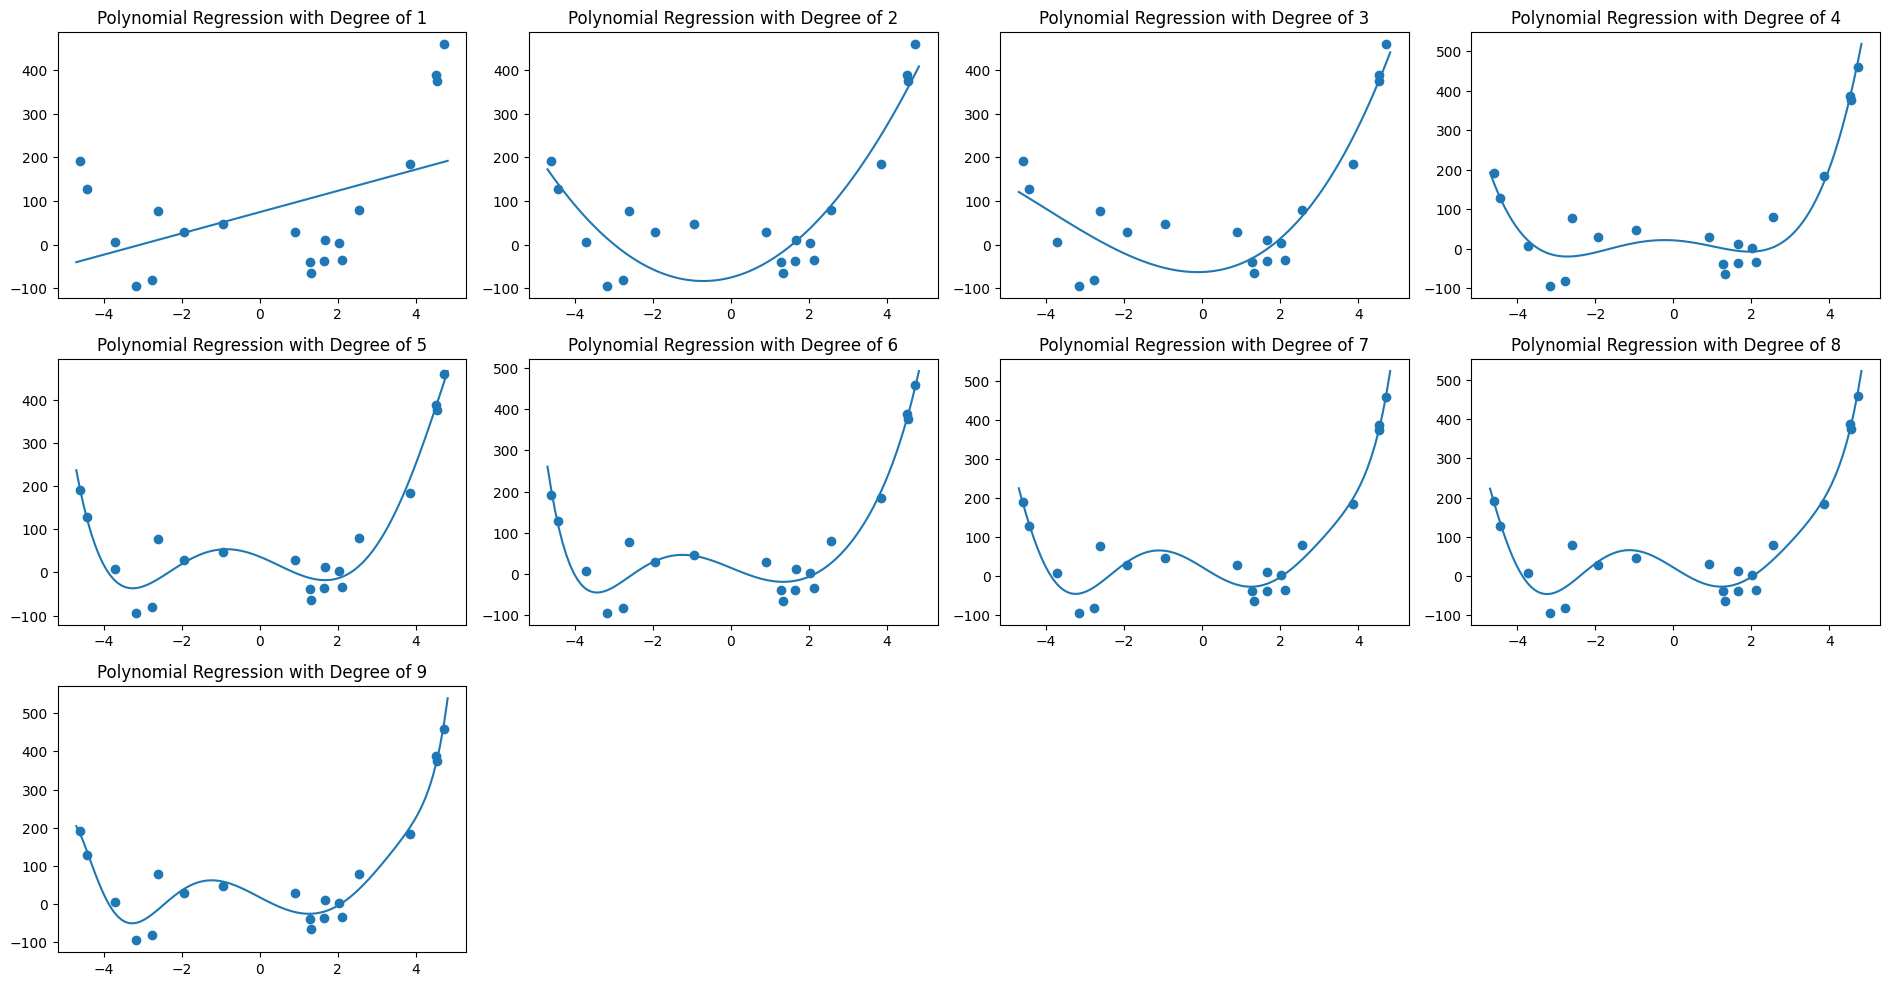

In [18]:
# Function to generate polynomial data
def generate_polynomial_data(n_samples, noise):
    X = np.random.uniform(-5, 5, size=(n_samples, 1))
    y = (0.8*X**4 + X**3 - 2*X**2 + X + 3) + noise*100 * np.random.randn(n_samples, 1)

    return X, y

# Generate polynomial data
n_samples = 100
noise = 0.5
X, y  = generate_polynomial_data(n_samples, noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(19, 13))
# Linear model with PolynomialFeatures degree=2

min_r = 1
max_r = 10
for i in range(min_r, max_r):
  poly = PolynomialFeatures(degree=i)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)

  lr_poly = LinearRegression()
  lr_poly.fit(X_poly_train, y_train)
  y_pred_poly = lr_poly.predict(X_poly_test)
  mse_poly = mean_squared_error(y_test, y_pred_poly)
  r2_poly = r2_score(y_test, y_pred_poly)

  print()
  print("Polynomial Degree =", i)
  print("    MSE: ", mse_poly)
  print("     R2: ", r2_poly)
  print()

  mymodel = np.poly1d(np.polyfit(X_test.ravel(), y_test.ravel(), i))
  myline = np.linspace(min(X_test.ravel()) - 0.1, max(X_test.ravel()) + 0.1, 100)

  plt.subplot(4, 4, i)
  plt.scatter(X_test, y_test)
  plt.title("Polynomial Regression with Degree of {}".format(i))
  plt.plot(myline, mymodel(myline))

plt.tight_layout()
plt.show()

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 8]  # Use only one feature for simplicity
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

poly_r2_scores = []

# Define the degree of polynomial features
for degree in range(2,10):
  # Create polynomial features
  poly = PolynomialFeatures(degree=degree)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Fit simple linear regression model
  lr = LinearRegression()
  lr.fit(X_train_poly, y_train)
  lr_pred = lr.predict(X_test_poly)
  lr_mse = mean_squared_error(y_test, lr_pred)
  poly_r2_scores.append(r2_score(y_test, lr_pred))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list(range(2, 10)), poly_r2_scores, label='Polynomial Regression', color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Degree')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

## Validação cruzada

In [ ]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Running using
lr_r2 = cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')
lasso_r2 = cross_val_score(Lasso(), X, y, cv=10, scoring='r2')
ridge_r2 = cross_val_score(Ridge(), X, y, cv=10, scoring='r2')

print("Resultados: ")
print("Regressão Linear: ", lr_r2.mean().round(2), " (", lr_r2.std().round(2),")")
print("           Lasso: ", lasso_r2.mean().round(2), " (", lasso_r2.std().round(2),")")
print("           Ridge: ", ridge_r2.mean().round(2), " (", ridge_r2.std().round(2),")")

In [ ]:
from sklearn.model_selection import KFold

#Using the same folds pa# Criar os folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lr_r2 = cross_val_score(LinearRegression(), X, y, cv=kf, scoring='r2')
lasso_r2 = cross_val_score(Lasso(), X, y, cv=kf, scoring='r2')
ridge_r2 = cross_val_score(Ridge(), X, y, cv=kf, scoring='r2')

print("Resultados: ")
print("Regressão Linear: ", lr_r2.mean().round(2), " (", lr_r2.std().round(2),")")
print("           Lasso: ", lasso_r2.mean().round(2), " (", lasso_r2.std().round(2),")")
print("           Ridge: ", ridge_r2.mean().round(2), " (", ridge_r2.std().round(2),")")

In [ ]:
#Getting predictions using cross val
model = LinearRegression()
predictions = cross_val_predict(model, X, y, cv=10)

# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("Mean Squared Error (MSE):", mse)
print("                      R2:", r2)

# Criar um gráfico de dispersão com os valores esperados e os valores preditos
plt.scatter(y, predictions, color='blue', label='Valores Preditos')

# Plotar uma linha diagonal para representar a linha y = x (valores esperados = valores preditos)
x_values = np.linspace(min(y), max(y), 100)
plt.plot(x_values, x_values, color='red', linestyle='--', label='Linha de Referência')

# Definir rótulos e título do gráfico
plt.xlabel('Valores Esperados')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Pontos: Valores Esperados vs Valores Preditos')

# Adicionar legenda
plt.legend()

# Adiciona grid
plt.grid(alpha=0.3)

# Exibir o gráfico
plt.show()

## Coeficientes

In [ ]:
#Gerando o modelo com todos os dados
model = LinearRegression()
model.fit(X, y)

print("Intercept: ", model.intercept_)
model.coef_

In [ ]:
fnames = diabetes.feature_names

print("Coeficientes das variáveis independentes:")
for variavel, coeficiente in dict(zip(fnames, model.coef_)).items():
    print(f"{variavel}: {coeficiente}")

In [ ]:
#Gerando o modelo com todos os dados
model = Ridge()
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coeficientes das variáveis independentes:")
for variavel, coeficiente in dict(zip(fnames, model.coef_)).items():
    print(f"{variavel}: {coeficiente}")

In [ ]:
#Gerando o modelo com todos os dados
model = Lasso()
model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coeficientes das variáveis independentes:")
for variavel, coeficiente in dict(zip(fnames, model.coef_)).items():
    print(f"{variavel}: {coeficiente}")